<a href="https://colab.research.google.com/github/caesar013/PCVK_GENAP_2023/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [1]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


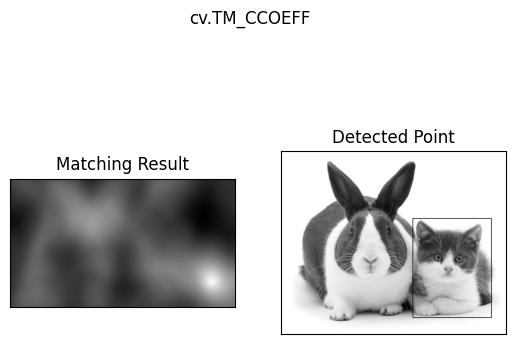

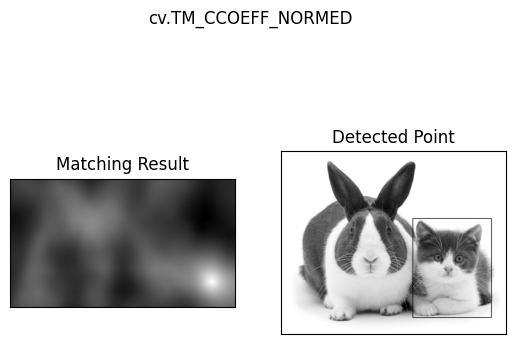

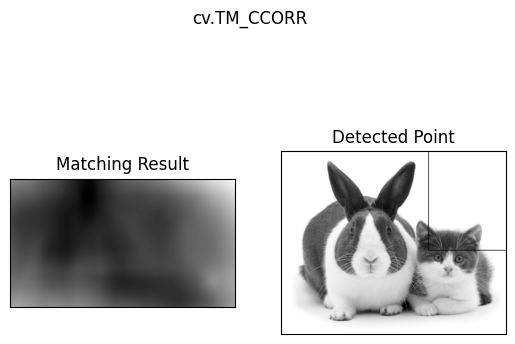

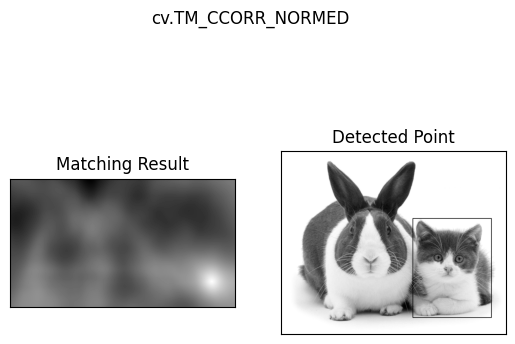

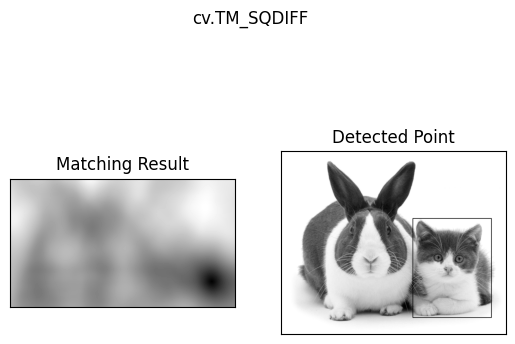

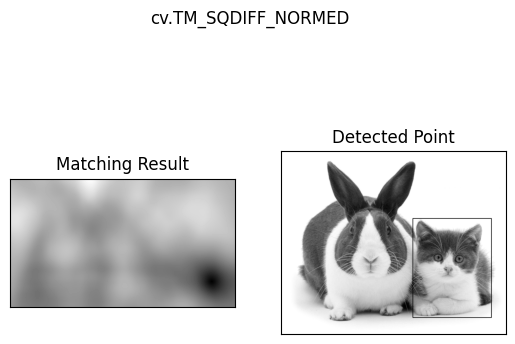

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images for PCVK/Object Detection/cats_and_bunnies.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img2 = img.copy()
template = cv.imread('/content/drive/MyDrive/PCVK/Images for PCVK/Object Detection/cat2_templatejpg.jpg', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, (0,255,0), 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

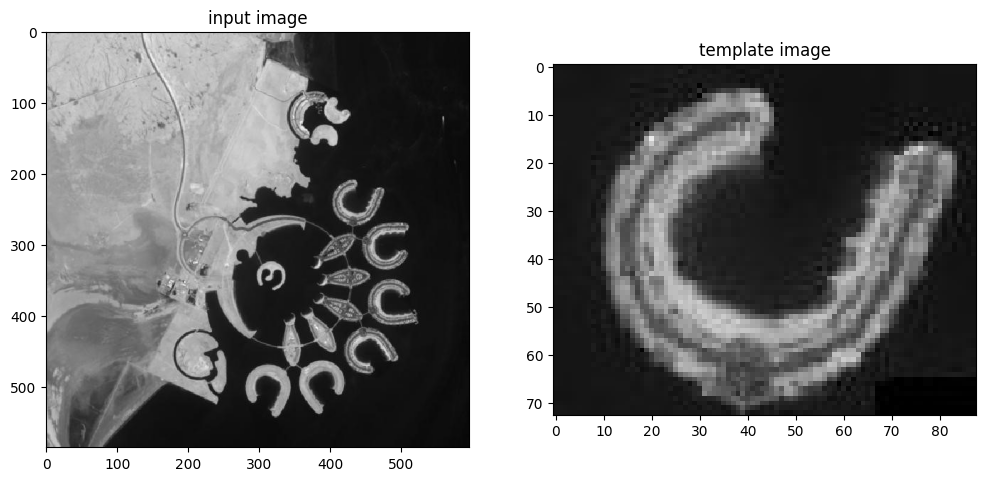

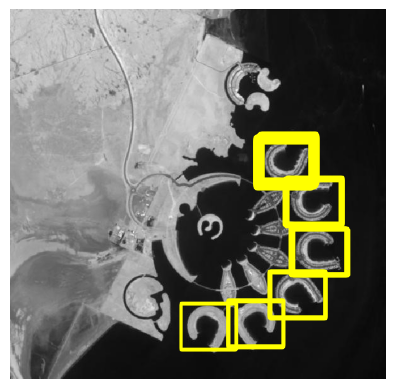

In [ ]:
# OTOMATIS
from PIL import Image
from skimage.feature import match_template # melakukan pencocokan template menggunakan metode cross-correlation.

# Load images
input_image = Image.open('/content/drive/MyDrive/PCVK/Images for PCVK/Object Detection/bahrain.jpg')
template_image = Image.open('/content/drive/MyDrive/PCVK/Images for PCVK/Object Detection/bahrain-template.jpg')

# Menampilkan citra input dan citra template
input_image.show()
template_image.show()

img = cv.imread('/content/drive/MyDrive/PCVK/Images for PCVK/Object Detection/bahrain.jpg', 0)
template = cv.imread('/content/drive/MyDrive/PCVK/Images for PCVK/Object Detection/bahrain-template.jpg', 0)

f, axarr = plt. subplots(1,2,figsize=(12,8))
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# Hitung kemiripan citra dengan citra template
result = match_template(img, template)

# Tentukan threshold untuk menentukan hasil match
threshold = 0.45
locations = np.where(result >= threshold)

# Plot hasil match
fig, ax = plt.subplots()
ax.imshow(img, cmap=plt.cm.gray)
ax.set_axis_off()
height, width = template.shape
for loc in zip(*locations[::-1]):
    rect = plt.Rectangle(loc, width, height, edgecolor='yellow', facecolor='none', linewidth=1)
    ax.add_patch(rect)
plt.show()

# # MANUAL
# import numpy as np
# import matplotlib.pyplot as plt
# from PIL import Image
# import cv2

# # Load images
# input_image = Image.open('/content/drive/MyDrive/PCVK/Images for PCVK/Object Detection/bahrain.jpg')
# template_image = Image.open('/content/drive/MyDrive/PCVK/Images for PCVK/Object Detection/bahrain-template.jpg')

# # Convert images to NumPy arrays
# input_array = np.array(input_image)
# template_array = np.array(template_image)

# # Display input and template images
# input_image.show()
# template_image.show()

# # Load images using OpenCV for comparison
# img = cv2.imread('/content/drive/MyDrive/PCVK/Images for PCVK/Object Detection/bahrain.jpg', cv2.IMREAD_GRAYSCALE)
# template = cv2.imread('/content/drive/MyDrive/PCVK/Images for PCVK/Object Detection/bahrain-template.jpg', cv2.IMREAD_GRAYSCALE)

# # Display input and template images using Matplotlib
# f, axarr = plt.subplots(1, 2, figsize=(12, 8))
# axarr[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axarr[0].set_title("input image")
# axarr[1].imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# # Perform template matching manually
# result_height = img.shape[0] - template.shape[0] + 1
# result_width = img.shape[1] - template.shape[1] + 1
# result = np.zeros((result_height, result_width))

# for y in range(result_height):
#     for x in range(result_width):
#         region_of_interest = img[y:y + template.shape[0], x:x + template.shape[1]]
#         correlation = np.sum(template * region_of_interest)
#         result[y, x] = correlation

# # Define threshold for matching result
# threshold = 0.45
# locations = np.where(result >= threshold)

# # Plot matching result
# fig, ax = plt.subplots()
# ax.imshow(img, cmap=plt.cm.gray)
# ax.set_axis_off()
# height, width = template.shape
# for loc in zip(*locations[::-1]):
#     rect = plt.Rectangle(loc, width, height, edgecolor='yellow', facecolor='none', linewidth=1)
#     ax.add_patch(rect)

# plt.show()

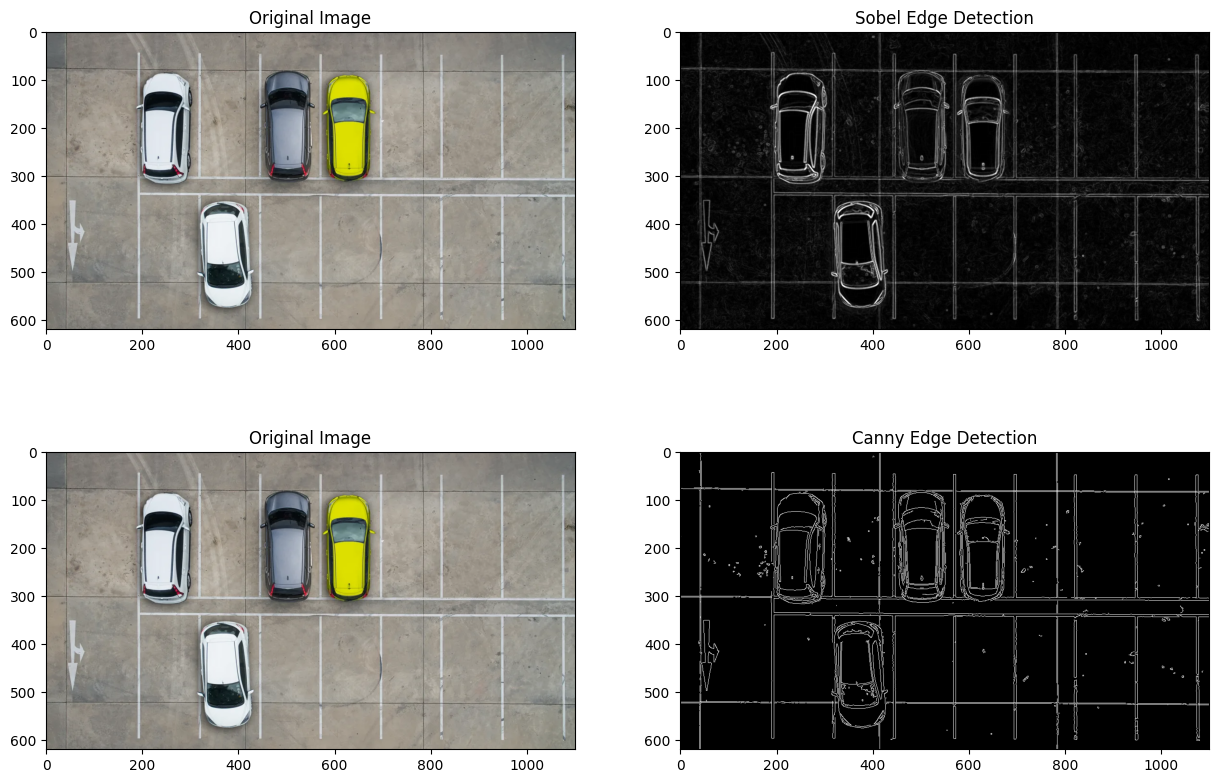

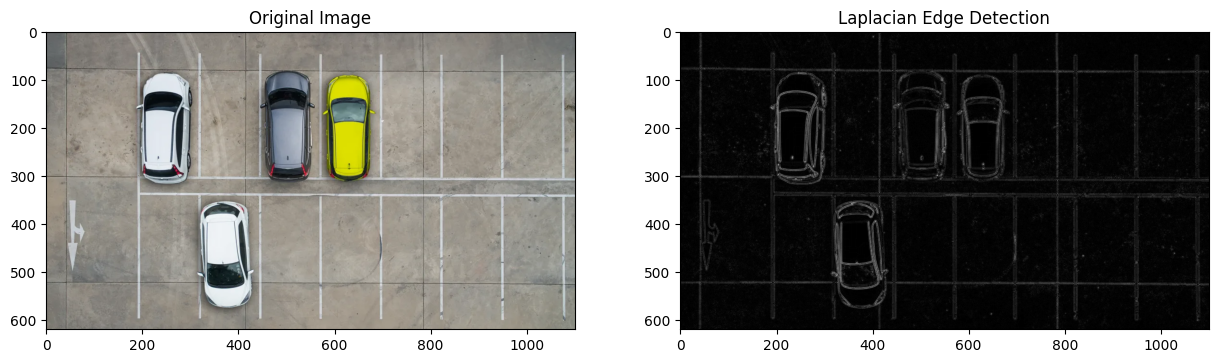

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load image
img0 = cv.imread('/content/drive/MyDrive/PCVK/Images for PCVK/Object Detection/car-park.jpg')

# Convert to grayscale
gray = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)

# Remove noise with GaussianBlur
imgg = cv.GaussianBlur(gray, (3, 3), 0)

# Sobel filtering
img_sobelx = cv.Sobel(imgg, cv.CV_64F, 1, 0, ksize=3)
img_sobely = cv.Sobel(imgg, cv.CV_64F, 0, 1, ksize=3)
img_sobelxy = cv.addWeighted(cv.convertScaleAbs(img_sobelx), 0.5, cv.convertScaleAbs(img_sobely), 0.5, 0)

# Canny Edge Detection
edged = cv.Canny(img0, 100, 200)

# Laplacian Edge Detection
img_laplacian = cv.Laplacian(imgg, cv.CV_64F)
img_laplacian = np.uint8(np.absolute(img_laplacian))

# Plot results
fig, axarr = plt.subplots(2, 2, figsize=(15, 10))

# Sobel Edge Detection
axarr[0, 0].imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
axarr[0, 0].set_title('Original Image')

axarr[0, 1].imshow(img_sobelxy, cmap='gray')
axarr[0, 1].set_title('Sobel Edge Detection')

# Canny Edge Detection
axarr[1, 0].imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
axarr[1, 0].set_title('Original Image')

axarr[1, 1].imshow(edged, cmap='gray')
axarr[1, 1].set_title('Canny Edge Detection')

# Laplacian Edge Detection
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')

ax[1].imshow(img_laplacian, cmap='gray')
ax[1].set_title('Laplacian Edge Detection')

plt.show()

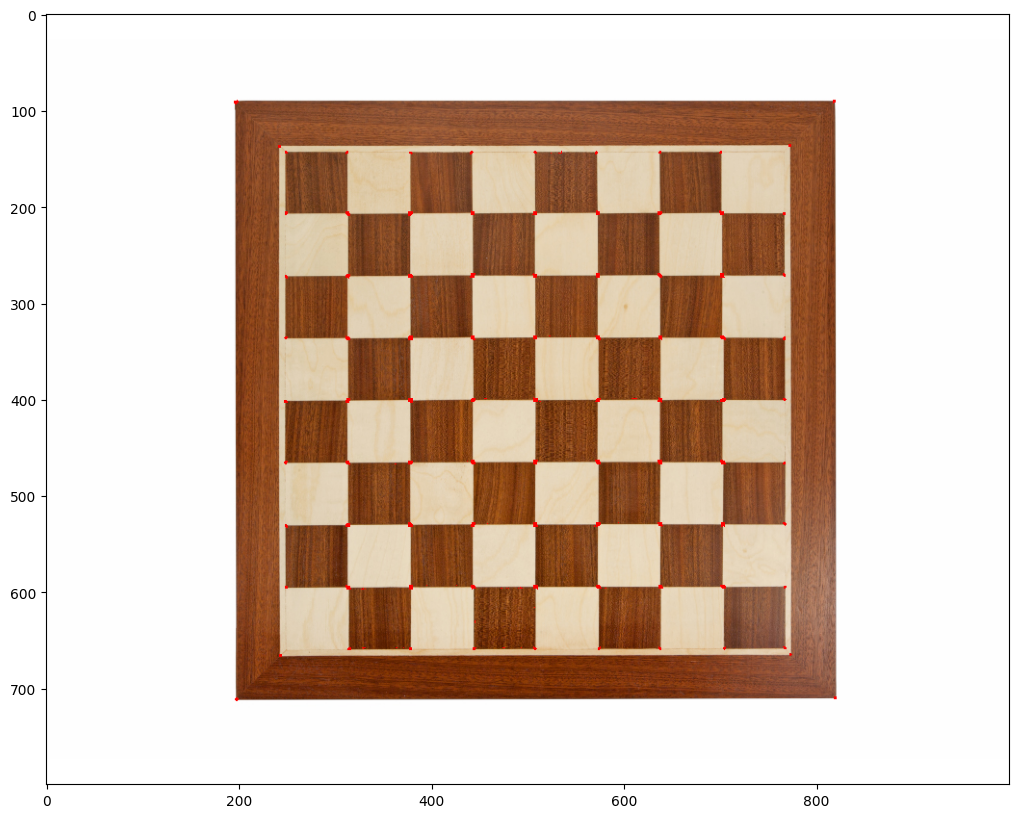

In [3]:
import cv2 as cv

import numpy as np
from matplotlib import pyplot as plt

#load citra input
input_img = cv.imread('/content/drive/MyDrive/PCVK/Images for PCVK/Object Detection/chess-board.jpg')
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(gray_img,3,1,0.04)

gray_img = np.float32(gray_img)
harris_output = cv.cornerHarris(gray_img,2,3, 3)
#hasil harris corner dilakukan dilasi untuk menandai sudut
harris_output = cv.dilate(harris_output, None)

#Threshold untuk mengoptimalkan nilai
input_img[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))


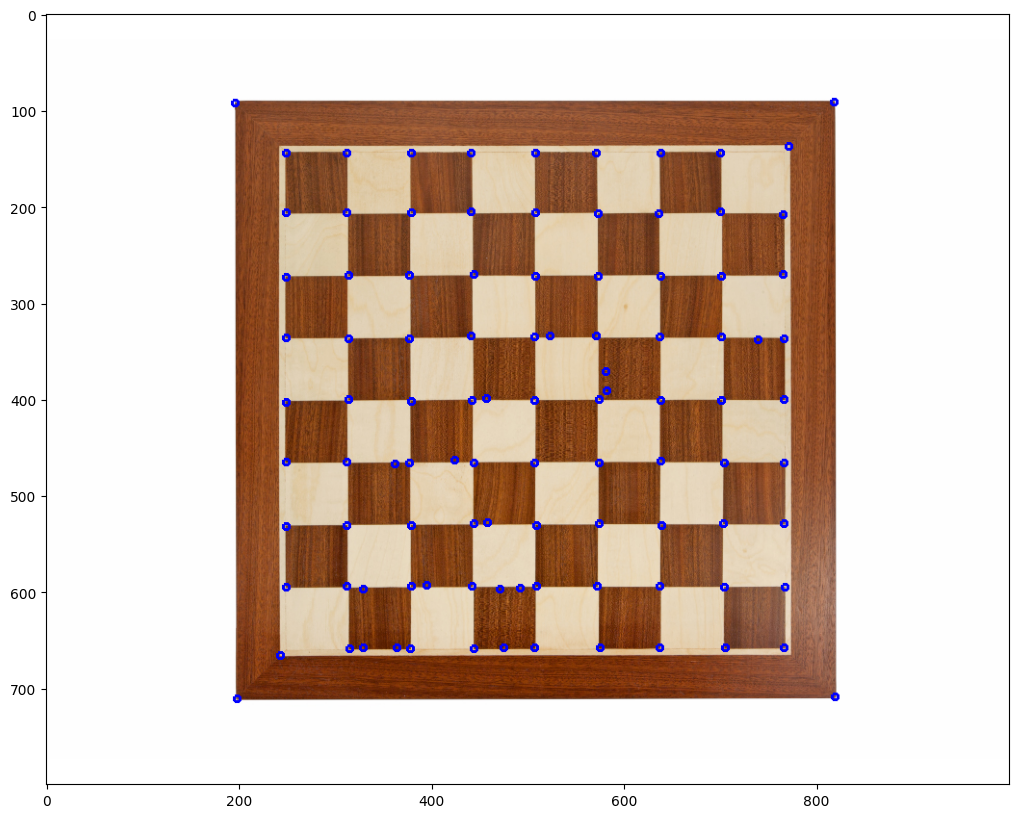

In [4]:
input_img = cv.imread('/content/drive/MyDrive/PCVK/Images for PCVK/Object Detection/chess-board.jpg')
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(gray_img, 100,0.01,10)
corners = np. int0(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(input_img, (x,y),3,255,2)

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

number of Hough lines: 33
Number of filtered lines: 1
Number of filtered lines: 2
Number of filtered lines: 3
Number of filtered lines: 4
Number of filtered lines: 5
Number of filtered lines: 6
Number of filtered lines: 7
Number of filtered lines: 8
Number of filtered lines: 9
Number of filtered lines: 10
Number of filtered lines: 11
Number of filtered lines: 12
Number of filtered lines: 13
Number of filtered lines: 14
Number of filtered lines: 15
Number of filtered lines: 16
Number of filtered lines: 17
Number of filtered lines: 18
Number of filtered lines: 19
Number of filtered lines: 20
Number of filtered lines: 21
Number of filtered lines: 22
Number of filtered lines: 23
Number of filtered lines: 24
Number of filtered lines: 25
Number of filtered lines: 26
Number of filtered lines: 27
Number of filtered lines: 28
Number of filtered lines: 29
Number of filtered lines: 30
Number of filtered lines: 31
Number of filtered lines: 32
Number of filtered lines: 32


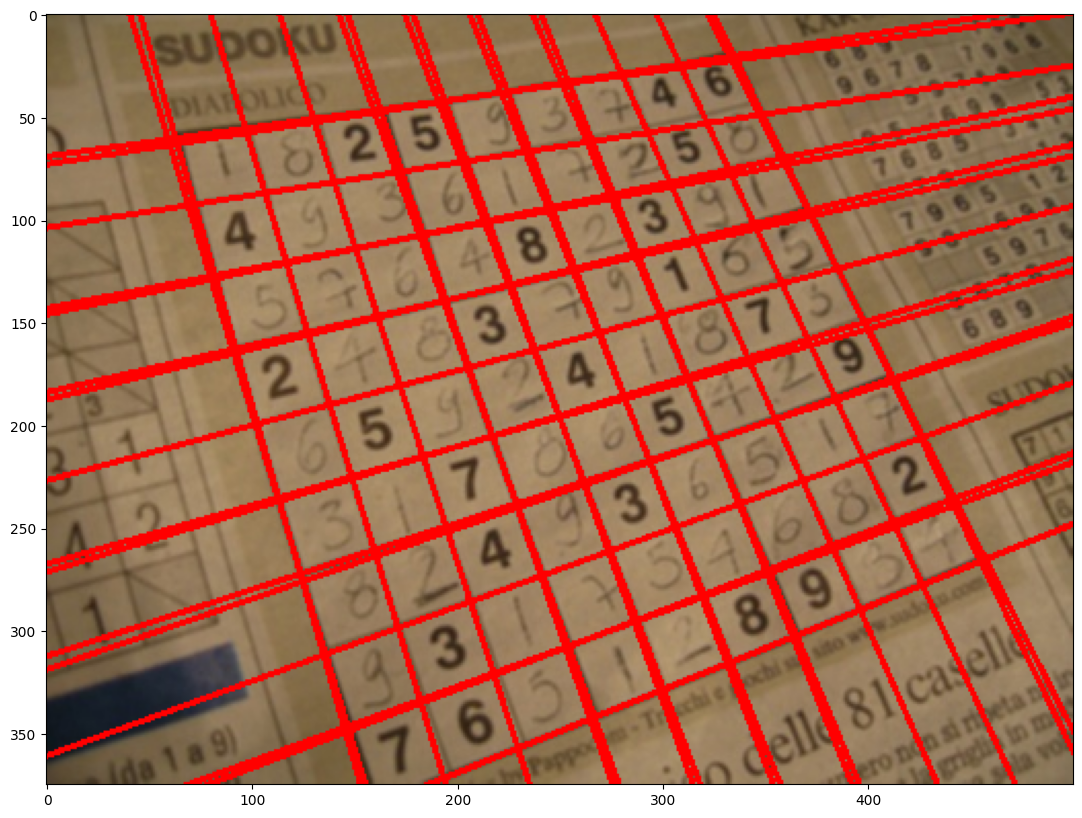

In [5]:
input_img = cv.imread('/content/drive/MyDrive/PCVK/Images for PCVK/Object Detection/sudoku.jpg')
img_gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

edges = cv.Canny (img_gray, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8)
edges = cv.dilate(edges,kernel,iterations = 1)

kernel = np.ones((5,5), np.uint8)
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges,1,np.pi/180,150)


if not lines.any():
    print('No lines were found')
    exit()

if filter:
    rho_threshold = 15
    theta_threshold = 0.1


    similar_lines = {i : [] for i in range(len(lines))}
    for i in range(len(lines)):
      for j in range (len (lines)):
        if i == j:
            continue

        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True]
    for i in range(len(lines) - 1):
        if not line_flags [indices[i]]:
            continue
    for j in range(i + 1, len(lines)):
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0]
            rho_j, theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('number of Hough lines:', len(lines))

    filtered_lines = []

    if filter:
        for i in range(len(lines)):
            if line_flags[i]:
                filtered_lines.append(lines[i])

            print('Number of filtered lines:', len(filtered_lines ))
    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv.line(input_img, (x1, y1), (x2,y2),(0,0,255),2)

    plt.figure(figsize=(20,10))
    plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

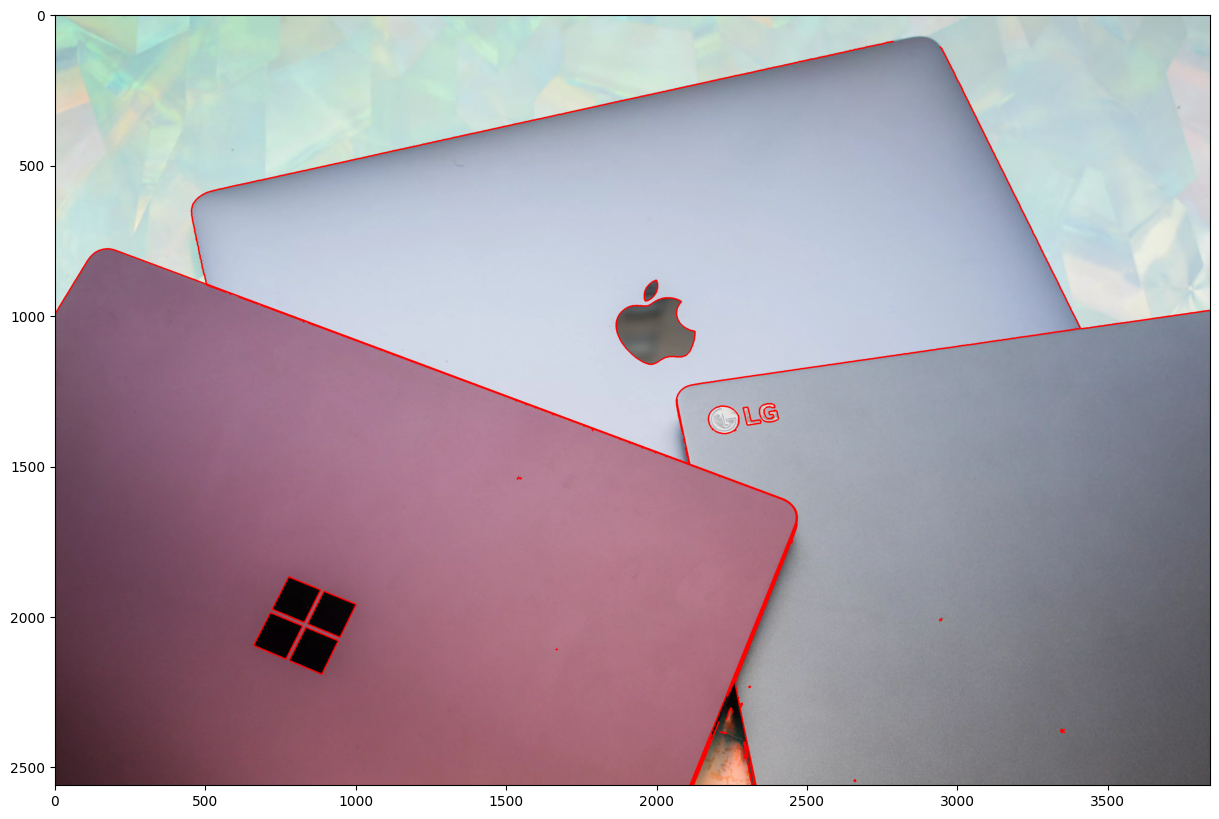

In [6]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images for PCVK/Object Detection/laptop.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

edged = cv.Canny(img_gray, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(img, contours, -1, (0,0,255), 3)

plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

# Tugas

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Figure size 800x1200 with 0 Axes>

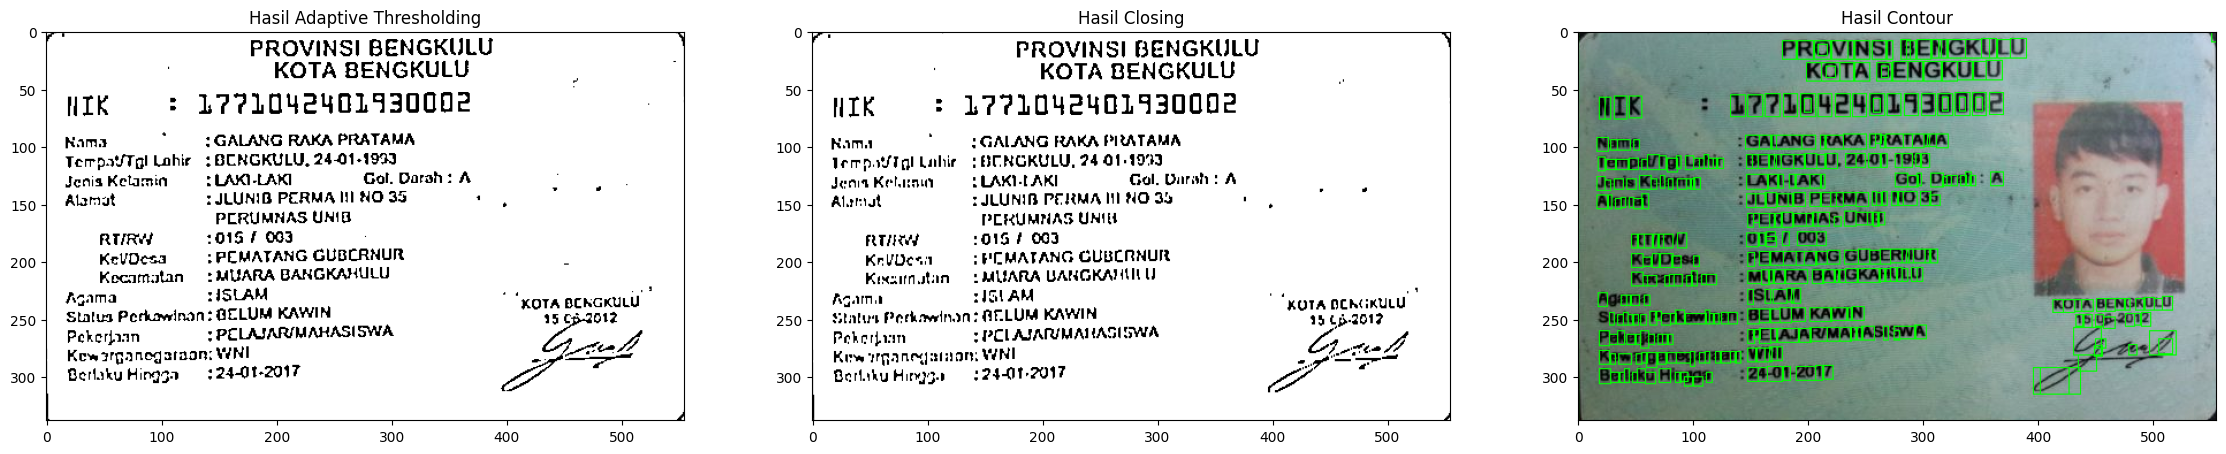

In [ ]:
import cv2 as cv
import cv2
import numpy as np
from matplotlib import pyplot as plt

from google.colab import drive

drive.mount('/content/drive')

# Load the image
img = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp1.png')
img = img[:, 25:580]

# Set the figure size
plt.figure(figsize=(8, 12))

# Apply Gaussian Blur
blurred_image = cv2.GaussianBlur(img, (3,3), 0)

# Contrast Enhancment
img_gray = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)
equalized_image = cv2.equalizeHist(img_gray)

# Adaptive Thresholding
block_size = 11  # Adjust as needed
constant = 15     # Adjust as needed
thresholded_image = cv2.adaptiveThreshold(
    img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, constant
)

# morphology
kernel = np.ones((2, 1), np.uint8)
morph_image = cv2.morphologyEx(thresholded_image, cv2.MORPH_CLOSE, kernel)

# contour detection
contours, hierarchy = cv.findContours(morph_image.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 8 and w >= 4 and float(ras) <= 4:
      cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), thickness=1)



contour_image = cv.cvtColor(img, cv.COLOR_BGR2RGB)
opened_image = cv.cvtColor(morph_image, cv.COLOR_GRAY2RGB)
thresholded_image = cv.cvtColor(thresholded_image, cv.COLOR_GRAY2RGB)

fig, axs = plt.subplots(1, 3, figsize=(28, 10))

axs[0].imshow(thresholded_image)
axs[0].set_title('Hasil Adaptive Thresholding')

axs[1].imshow(opened_image)
axs[1].set_title('Hasil Closing')

axs[2].imshow(contour_image)
axs[2].set_title('Hasil Contour')

plt.show()